# Data Collection

For this project, we aim to build a **predictive model** that could **classify forest cover type** based on **cartographic variables**. Understanding the relationships among these variables could be valuable for **land management** and **ecological studies**.

## 1. Data Source and Subject

- **Subject**: The dataset contains information about different forest cover types, which is Spruce/Fir, Lodgepole Pine, Aspen, and so on, in four wilderness areas located in Roosevelt National Forest of Nothern Colorado. Each observation represents a $30*30$ meters cell and includes various cartographic variables such as elevation, slope, aspect, distance to hydrology, and soil type.
- **Source**: We are using the "Covertype" dataset available from UCI Machine Learning Repository: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset/.

## 2. Data License

The dataset is made available under the Public Domain. There are no restrictions on its use, modification, or distribution.

## 3. Data Collection Method

- **Method**: The data was originally collected by the US Forest Service (USFS) Region 2 Resource Information System (RIS). The observations were derived from data obtained from the US Geological Survey (USGS) and the USFS.
  - **Catographic Variables**: Cartographic variables were determined using USGS Digital Elevation Model (DEMs) and other geographic information system (GIS) data.
  - **Soil Type**: Soil type designations were based on USFS Ecological Landtype Units (ELUs).
  - **Wilderness Area**: The actual forest cover type for each 30 x 30-meter cell was determined using observations and aerial photography.

## 4. Data Ethics and Limitations

- **Data Collection Date**: The dataset was donated on 7/31/1998. Forest cover type could change overtime due to natural disturbances and human activities. Therefore, the data may not perfectly reflect current forest conditions in Roosevelt National Forest.
- **Spatial**: The $30*30$ meters solution may not capture fine-scale variations in forest cover type within each cell.
- **Data Accuracy**: While the data has been widely used, it's important to note that the accuracy of the original USFS and USGS data sources can influence the reliability of the dataset.
- **Limited Scope:** This dataset is specific to a limited region in Colorado, so our findings might not be directly transferable to other forests.

# Data Exploratory Analysis (EDA)

## 1. Import Libraries

In [45]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Basic Description

In [47]:
df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [48]:
rows, cols = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')

Number of rows: 581012
Number of columns: 55


As you could see that there are 581012 rows, and 55 columns. 

Each row represents a $30*30$ cell of a forest land within the **Roosevelt National Forest of northern Colorado**.

The columns represent the following cartographic and ecological variables:

*   **Elevation:** Elevation in meters.
*   **Aspect:** Aspect in degrees azimuth.
*   **Slope:** Slope in degrees.
*   **Horizontal\_Distance\_To\_Hydrology:** Horizontal distance to the nearest surface water feature (in meters).
*   **Vertical\_Distance\_To\_Hydrology:** Vertical distance to the nearest surface water feature (in meters).
*   **Horizontal\_Distance\_To\_Roadways:** Horizontal distance to the nearest roadway (in meters).
*   **Hillshade\_9am:** Hillshade index at 9 am on the summer solstice (0 to 255 index).
*   **Hillshade\_Noon:** Hillshade index at noon on the summer solstice (0 to 255 index).
*   **Hillshade\_3pm:** Hillshade index at 3 pm on the summer solstice (0 to 255 index).
*   **Horizontal\_Distance\_To\_Fire\_Points:** Horizontal distance to the nearest wildfire ignition point (in meters).
*   **Wilderness\_Area\_1 to Wilderness\_Area\_4:** One-hot encoded columns representing the wilderness area:
    *   1: Rawah Wilderness Area
    *   2: Neota Wilderness Area
    *   3: Comanche Peak Wilderness Area
    *   4: Cache la Poudre Wilderness Area
*   **Soil\_Type\_1 to Soil\_Type\_40:** One-hot encoded columns representing 40 different soil types (ELUs).
*   **Cover\_Type:** The forest cover type (integer class label 1-7), which is the target variable:
    *   1: Spruce/Fir
    *   2: Lodgepole Pine
    *   3: Ponderosa Pine
    *   4: Cottonwood/Willow
    *   5: Aspen
    *   6: Douglas-fir
    *   7: Krummholz

## 3. Data Quality Checks

In [51]:
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicated rows: {duplicate_rows}')

Number of duplicated rows: 0


So there are no duplicated rows in the dataset.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

**Observation:** The data types appear appropriate. Numerical features are `int64`, and the one-hot encoded categorical features are `int64` (which is suitable for binary 0/1 representation).

## 4. Numerical Data Analysis

Let's analyze each numerical column: `Elevation`, `Aspect`, `Slope`, `Horizontal_Distance_To_Hydrology`, `Vertical_Distance_To_Hydrology`, `Horizontal_Distance_To_Roadways`, `Hillshade_9am`, `Hillshade_Noon`, `Hillshade_3pm`, `Horizontal_Distance_To_Fire_Points`.

1. `Elevation`
- Represents the height above sea level (in meters).
- Expected range: Depends on the location of the forest; typically between 0 and 8848 (highest elevation on Earth).
- Potential abnormalities:
    - Extremely low values (e.g., negative or close to zero, as forests aren’t in deep depressions).
    - Extremely high values (e.g., > 9000 meters, unlikely for forested areas).
  
2. `Aspect`
- Represents the compass direction of the slope (0 to 360 degrees).
- Expected range: 0–360 (where 0 = North, 90 = East, etc.).
- Potential abnormalities:
    - Values outside 0–360.
    - Missing or default values (e.g., if coded as -1 or 999).
      
3. `Slope`
- Represents the steepness of the slope in degrees.
- Expected range: 0–90 degrees (0 = flat, 90 = vertical).
- Potential abnormalities:
    - Values greater than 90 or less than 0.
    - Extremely high slopes (close to 90) could indicate rare or misreported areas.
      
4. `Horizontal_Distance_To_Hydrology`
- Horizontal distance to the nearest water body (in meters).
- Expected range: Depends on the forest’s geography but typically positive values (as distances cannot be negative).
- Potential abnormalities:
    - Negative values (not possible for distance).
    - Extremely large distances (e.g., thousands of kilometers, which might indicate erroneous or unscaled data).
      
5. `Vertical_Distance_To_Hydrology`
- Vertical distance to the nearest water body (in meters).
- Expected range: Positive or negative values (positive = above water level; negative = below water level).
- Potential abnormalities:
    - Extremely large positive or negative values (e.g., > ±500 meters, as water bodies are usually close to ground level).
      
6. `Horizontal_Distance_To_Roadways`
- Horizontal distance to the nearest road (in meters).
- Expected range: Positive values (distance cannot be negative).
- Potential abnormalities:
    - Negative values.
    - Extremely large distances (e.g., >100 km in highly connected areas might be questionable).
      
7. `Hillshade_9am, Hillshade_Noon, Hillshade_3pm`
- Indicate the amount of sunlight (0–255) at specific times of day.
- Expected range: 0–255 (0 = no sunlight, 255 = maximum sunlight).
- Potential abnormalities:
    - Values outside 0–255.
    - Simultaneously high values for all three times (unlikely due to natural shading and light direction).
    - Simultaneously low values for all three times (e.g., 0, 0, 0, which might indicate data recording errors).
      
8. `Horizontal_Distance_To_Fire_Points`
- Horizontal distance to the nearest fire point (in meters).
- Expected range: Positive values (distance cannot be negative).
- Potential abnormalities:
    - Negative values.
    - Extremely large distances (e.g., thousands of kilometers might indicate data errors or poor scaling).

Analysis of columns: Elevation


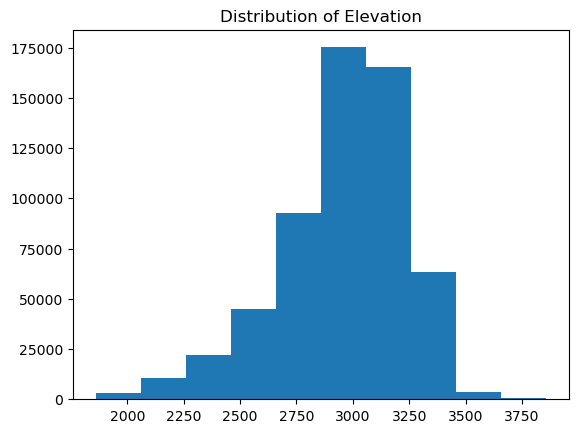

Percentage of missing values: 0.00%
Min value: 1859
Max value: 3858
Number of abnormal values: 0
Abnormal values:  Series([], Name: Elevation, dtype: int64)


Analysis of columns: Aspect


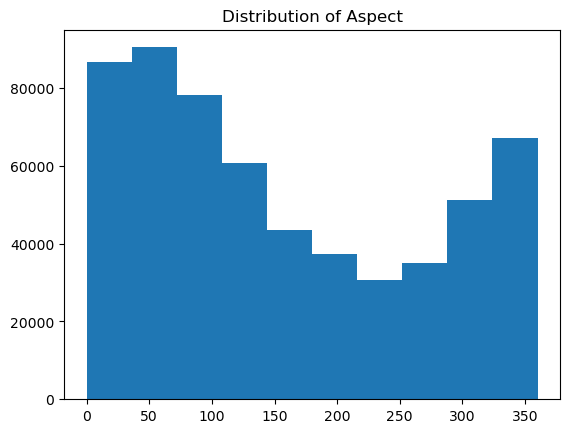

Percentage of missing values: 0.00%
Min value: 0
Max value: 360
Number of abnormal values: 0
Abnormal values:  Series([], Name: Aspect, dtype: int64)


Analysis of columns: Slope


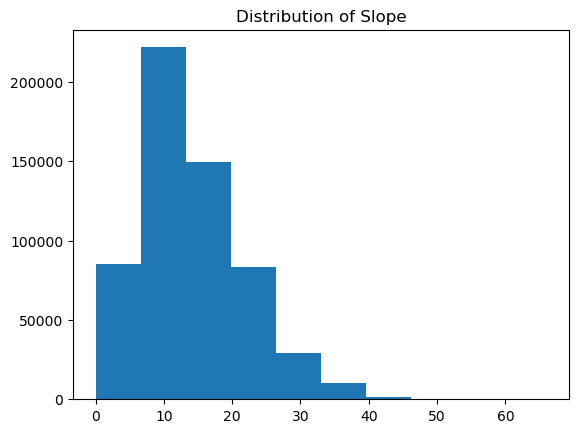

Percentage of missing values: 0.00%
Min value: 0
Max value: 66
Number of abnormal values: 0
Abnormal values:  Series([], Name: Slope, dtype: int64)


Analysis of columns: Horizontal_Distance_To_Hydrology


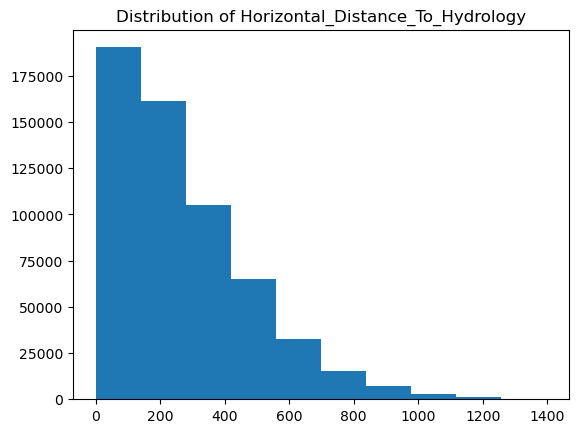

Percentage of missing values: 0.00%
Min value: 0
Max value: 1397
Number of abnormal values: 0
Abnormal values:  Series([], Name: Horizontal_Distance_To_Hydrology, dtype: int64)


Analysis of columns: Vertical_Distance_To_Hydrology


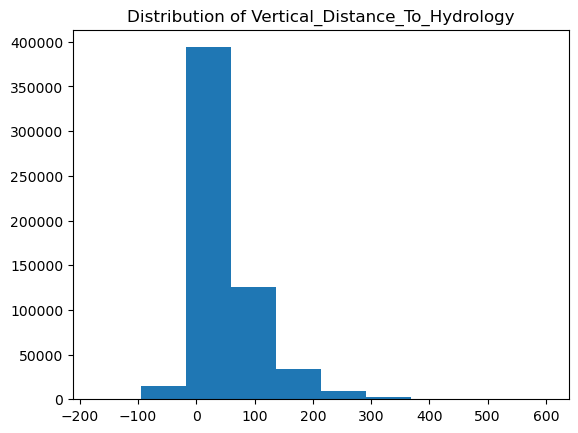

Percentage of missing values: 0.00%
Min value: -173
Max value: 601
Number of abnormal values: 113
Abnormal values:  1803      554
1892      547
11938     547
218208    530
218209    550
         ... 
225518    595
225982    504
225983    527
225984    544
225985    564
Name: Vertical_Distance_To_Hydrology, Length: 113, dtype: int64


Analysis of columns: Horizontal_Distance_To_Roadways


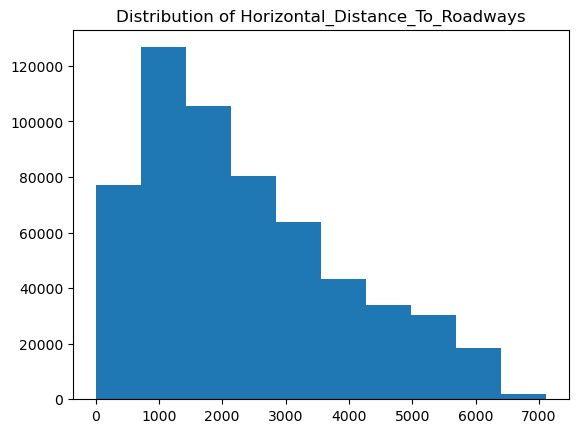

Percentage of missing values: 0.00%
Min value: 0
Max value: 7117
Number of abnormal values: 0
Abnormal values:  Series([], Name: Horizontal_Distance_To_Roadways, dtype: int64)


Analysis of columns: Hillshade_9am


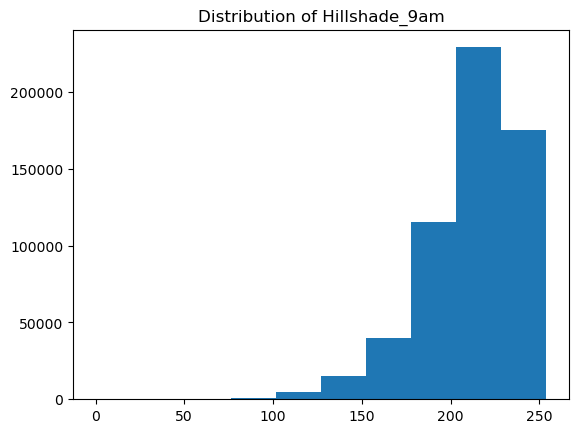

Percentage of missing values: 0.00%
Min value: 0
Max value: 254
Number of abnormal values: 0
Abnormal values:  Series([], Name: Hillshade_9am, dtype: int64)


Analysis of columns: Hillshade_Noon


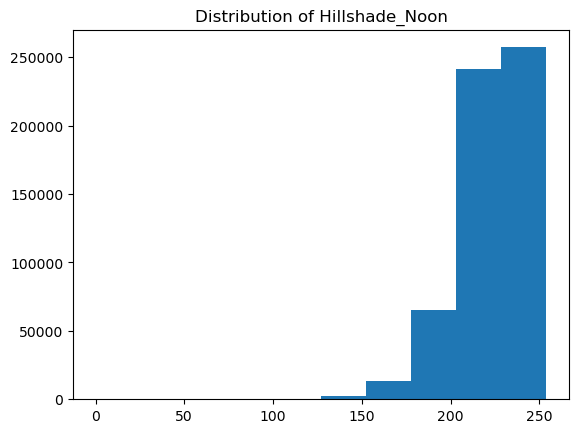

Percentage of missing values: 0.00%
Min value: 0
Max value: 254
Number of abnormal values: 0
Abnormal values:  Series([], Name: Hillshade_Noon, dtype: int64)


Analysis of columns: Hillshade_3pm


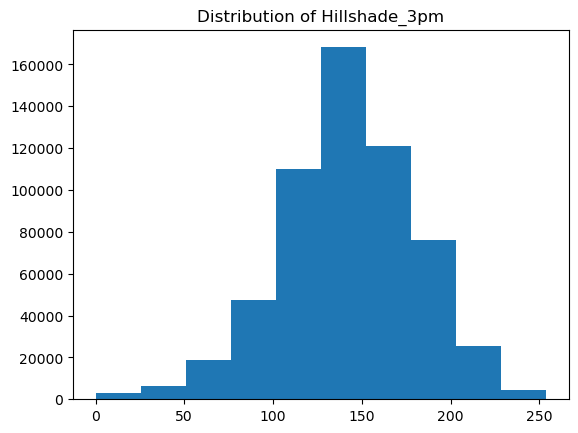

Percentage of missing values: 0.00%
Min value: 0
Max value: 254
Number of abnormal values: 0
Abnormal values:  Series([], Name: Hillshade_3pm, dtype: int64)


Analysis of columns: Horizontal_Distance_To_Fire_Points


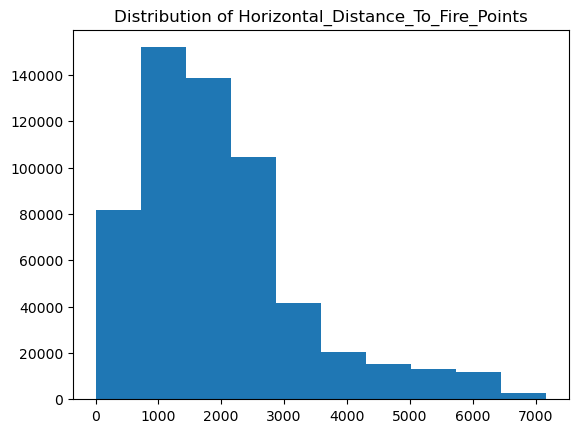

Percentage of missing values: 0.00%
Min value: 0
Max value: 7173
Number of abnormal values: 0
Abnormal values:  Series([], Name: Horizontal_Distance_To_Fire_Points, dtype: int64)




In [57]:
numerical_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                  'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points']

def identify_abnormal_values(df):
    abnormal_values = {}

    # 1. Elevation: Check for negative or too high values
    abnormal_values['Elevation'] = df[(df['Elevation'] < 0) | (df['Elevation'] > 8848)]['Elevation']

    # 2. Aspect: Check for values outside 0-360
    abnormal_values['Aspect'] = df[(df['Aspect'] < 0) | (df['Aspect'] > 360)]['Aspect']

    # 3. Slope: Check for values outside 0-90
    abnormal_values['Slope'] = df[(df['Slope'] < 0) | (df['Slope'] > 90)]['Slope']

    # 4. Horizontal_Distance_To_Hydrology: Check for negative values or extreme distances
    abnormal_values['Horizontal_Distance_To_Hydrology'] = df[(df['Horizontal_Distance_To_Hydrology'] < 0) | (df['Horizontal_Distance_To_Hydrology'] > 100000)]['Horizontal_Distance_To_Hydrology']

    # 5. Vertical_Distance_To_Hydrology: Check for extreme values
    abnormal_values['Vertical_Distance_To_Hydrology'] = df[(df['Vertical_Distance_To_Hydrology'] < -500) | (df['Vertical_Distance_To_Hydrology'] > 500)]['Vertical_Distance_To_Hydrology']

    # 6. Horizontal_Distance_To_Roadways: Check for negative values or extreme distances
    abnormal_values['Horizontal_Distance_To_Roadways'] = df[(df['Horizontal_Distance_To_Roadways'] < 0) | (df['Horizontal_Distance_To_Roadways'] > 100000)]['Horizontal_Distance_To_Roadways']

    # 7. Hillshade_9am, Hillshade_Noon, Hillshade_3pm: Check for values outside 0-255
    abnormal_values['Hillshade_9am'] = df[(df['Hillshade_9am'] < 0) | (df['Hillshade_9am'] > 255)]['Hillshade_9am']
    abnormal_values['Hillshade_Noon'] = df[(df['Hillshade_Noon'] < 0) | (df['Hillshade_Noon'] > 255)]['Hillshade_Noon']
    abnormal_values['Hillshade_3pm'] = df[(df['Hillshade_3pm'] < 0) | (df['Hillshade_3pm'] > 255)]['Hillshade_3pm']

    # 8. Horizontal_Distance_To_Fire_Points: Check for negative values or extreme distances
    abnormal_values['Horizontal_Distance_To_Fire_Points'] = df[(df['Horizontal_Distance_To_Fire_Points'] < 0) | (df['Horizontal_Distance_To_Fire_Points'] > 100000)]['Horizontal_Distance_To_Fire_Points']

    # Return abnormal values for each feature
    return abnormal_values

abnormal_values = identify_abnormal_values(df)

for col in numerical_cols:
    print(f'Analysis of columns: {col}')

    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

    missing_percentage = df[col].isnull().sum() * 100.0 / rows
    print(f'Percentage of missing values: {missing_percentage:.2f}%')

    min_val = df[col].min()
    max_val = df[col].max()

    print(f'Min value: {min_val}')
    print(f'Max value: {max_val}')

    print(f'Number of abnormal values: {len(abnormal_values[col])}')
    print('Abnormal values: ', abnormal_values[col])

    print('\n')
    

As we could see, there are 113 abnormal values of the column `Vertical_Distance_To_Hydrology`, which is the value 500 meters above the water, **Water bodies** can indeed be found at elevations above 500 meters, especially in mountainous or highland regions.

According to the location (Roosevelt National Forest), we have some further informations:
- **Location:** Roosevelt National Forest is located in the Rocky Mountains of northern Colorado, which are highly mountainous areas.
- **Elevation:** The elevation of this forest varies widely due to the mountainous terrain. Some areas in the forest have elevations ranging from about 1,500 meters (5,000 feet) to over 4,000 meters (13,000 feet).
- **Water Bodies:** There are numerous rivers, streams, and lakes throughout the forest, and some of them are indeed located at high elevations.

**Conclusion:** It is kinda normal to have 113 values > 500 meters.

## 5. Categorical Data Analysis

Categorical columns include from `Wilderness_Area_1` -> `Wilderness_Area_40`, and from `Soil_Type_1` -> `Soil_Type_40`, and `Cover_Type`. However, we will treat `Wilderness_Area` and `Soil_Type` as one column each, for easier analysis.

In [61]:
wilderness_cols = [col for col in df.columns if 'Wilderness_Area' in col]
df['Wilderness_Area'] = df[wilderness_cols].idxmax(axis=1).str.replace('Wilderness_Area', '')

soil_type_cols = [col for col in df.columns if 'Soil_Type' in col]
df['Soil_Type'] = df[soil_type_cols].idxmax(axis=1).str.replace('Soil_Type', '')

Analysis of column: Wilderness_Area


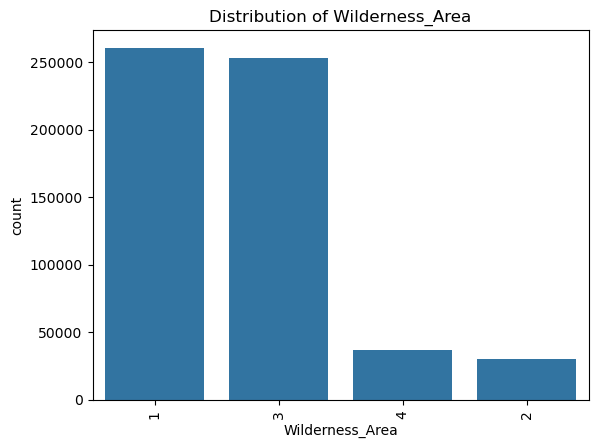

Percentage of missing values: 0.00%
Number of unique values: 4
Example of unique values:  ['1' '3' '4' '2']


Analysis of column: Soil_Type


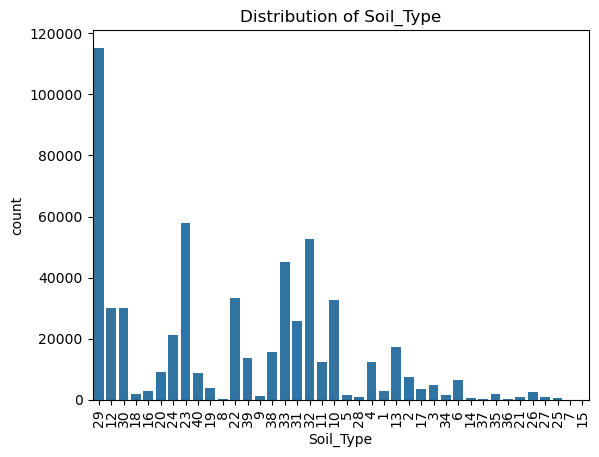

Percentage of missing values: 0.00%
Number of unique values: 40
Example of unique values:  ['29' '12' '30' '18' '16']


Analysis of column: Cover_Type


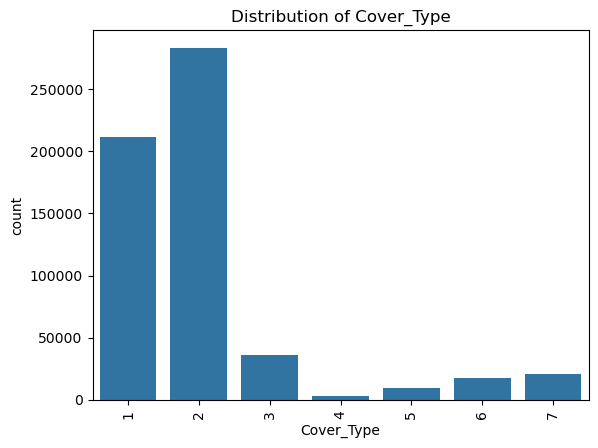

Percentage of missing values: 0.00%
Number of unique values: 7
Example of unique values:  [5 2 1 7 3 6 4]




In [62]:
categorical_cols = ['Wilderness_Area', 'Soil_Type', 'Cover_Type']

for col in categorical_cols:
    print(f'Analysis of column: {col}')

    # Distribution
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

    missing_percentage = df[col].isnull().sum() * 100.0 / rows
    print(f'Percentage of missing values: {missing_percentage:.2f}%')

    unique_cnt = df[col].nunique()
    unique_vals = df[col].unique()
    print(f'Number of unique values: {unique_cnt}')
    print('Example of unique values: ', unique_vals[:] if len(unique_vals) <= 10 else unique_vals[:5])
    print('\n')
    

According to my observation of the unique values display in each column, there are **no** abnormal values in **Categorical Columns**.

# Question Formulation

This section outlines the key questions we aim to answer through our analysis of the Forest Cover Type dataset. We will focus on questions that are both meaningful (i.e., have practical implications) and answerable using the available data. Based on our EDA, we have identified several potential areas of investigation.

## Question 1: What is the relationship between elevation and forest cover type?

**Motivation:** Understanding how elevation influences the distribution of different forest cover types can be valuable for ecological modeling, predicting the impacts of climate change on forest ecosystems, and informing land management decisions. For instance, if certain cover types are restricted to specific elevation ranges, they might be more vulnerable to changes in temperature or precipitation patterns.

**Feasibility:** We can investigate this relationship using the `Elevation` (numerical) and `Cover_Type` (categorical) variables. We can use visualizations like boxplots or violin plots to compare the elevation distributions for each cover type and potentially identify distinct elevation preferences.

In [67]:
elevation_stats = df.groupby('Cover_Type')['Elevation'].describe()
print(elevation_stats)

               count         mean         std     min      25%     50%  \
Cover_Type                                                               
1           211840.0  3128.644888  157.805543  2466.0  3033.00  3146.0   
2           283301.0  2920.936061  186.579366  2142.0  2794.00  2935.0   
3            35754.0  2394.509845  196.732427  1859.0  2260.25  2404.0   
4             2747.0  2223.939934  102.524587  1988.0  2142.00  2231.0   
5             9493.0  2787.417571   96.594047  2482.0  2732.00  2796.0   
6            17367.0  2419.181897  188.762292  1863.0  2320.00  2428.0   
7            20510.0  3361.928669  106.915301  2868.0  3299.25  3363.0   

               75%     max  
Cover_Type                  
1           3235.0  3686.0  
2           3042.0  3433.0  
3           2549.0  2899.0  
4           2304.0  2526.0  
5           2857.0  3011.0  
6           2544.0  2900.0  
7           3409.0  3858.0  


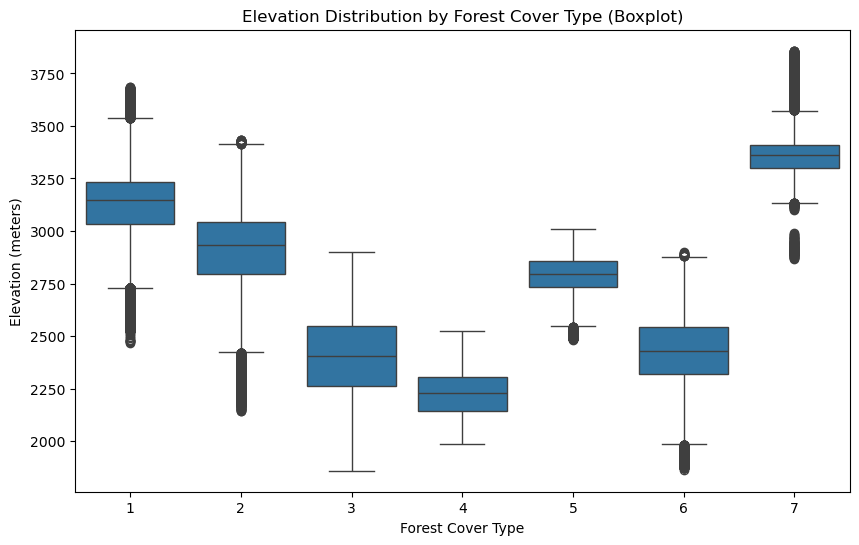

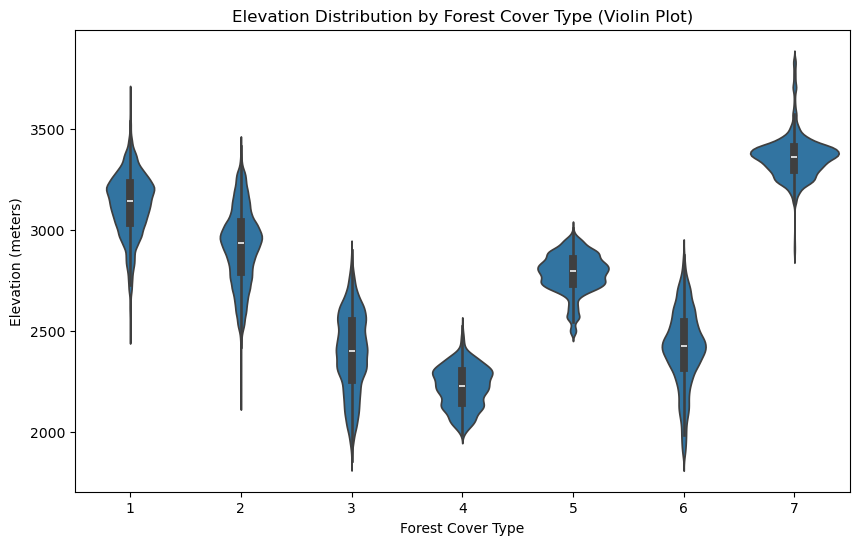

In [68]:
# Boxplot of elevation by cover type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df)
plt.title('Elevation Distribution by Forest Cover Type (Boxplot)')
plt.xlabel('Forest Cover Type')
plt.ylabel('Elevation (meters)')
plt.show()

# Violin plot of elevation by cover type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cover_Type', y='Elevation', data=df)
plt.title('Elevation Distribution by Forest Cover Type (Violin Plot)')
plt.xlabel('Forest Cover Type')
plt.ylabel('Elevation (meters)')
plt.show()

Okay, let's analyze the provided statistics and the boxplot/violin plot to write a conclusion about the relationship between elevation and forest cover type.

**Conclusion Based on Descriptive Statistics and Plots:**

Our analysis of the Forest Cover Type dataset reveals distinct patterns in the distribution of elevation across the different cover types. Here's a summary of our findings based on the descriptive statistics and visualizations:

**Key Observations:**

1. **Cover Type 7 (Krummholz):** This cover type is associated with the highest elevations, as evidenced by its highest mean elevation (around 3362 meters) and the highest maximum value (3858 meters). The boxplot and violin plot confirm this, showing a distribution shifted upwards compared to other cover types. The relatively narrow interquartile range in the boxplot suggests that most Krummholz stands are found within a relatively concentrated elevation band.
2. **Cover Type 1 (Spruce/Fir):** This cover type also tends to occur at high elevations, with a mean elevation of approximately 3129 meters. Its distribution in the violin plot is relatively wide, indicating that Spruce/Fir forests can be found across a broader range of high elevations, supported by the large standard deviation (around 158 meters). The boxplot shows some potential outliers at lower elevations, suggesting that Spruce/Fir might occasionally be found in lower, isolated pockets.
3. **Cover Type 2 (Lodgepole Pine):**  Lodgepole Pine exhibits a wide elevation range but generally prefers mid-to-high elevations. Its mean elevation is around 2921 meters, but the violin plot shows a broad distribution, and the boxplot indicates a large interquartile range. This suggests that Lodgepole Pine is adaptable to various elevation conditions.
4. **Cover Type 5 (Aspen):** Aspen forests have a mean elevation of around 2787 meters. The violin plot shows a relatively symmetrical distribution centered around this mean, and the boxplot suggests a moderate spread.
5. **Cover Type 6 (Douglas-fir):** This cover type is found at mid-to-low elevations, with a mean of approximately 2419 meters. The violin plot indicates a distribution skewed slightly towards higher elevations, but the boxplot confirms that most Douglas-fir stands are within a relatively narrow elevation band at lower elevations.
6. **Cover Type 3 (Ponderosa Pine):** Ponderosa Pine shows a preference for lower elevations, with the second-lowest mean elevation (around 2395 meters). The boxplot and violin plot confirm this, with distributions shifted downwards compared to other cover types.
7. **Cover Type 4 (Cottonwood/Willow):** This cover type is associated with the lowest elevations, having the lowest mean elevation (approximately 2224 meters) and the lowest maximum value (2526 meters). The narrow interquartile range and the concentrated distribution in the violin plot indicate that Cottonwood/Willow stands are typically restricted to lower elevation areas.

**Overall Interpretation:**

The analysis strongly suggests that elevation plays a significant role in determining the distribution of forest cover types in the Roosevelt National Forest. There is a clear trend of different cover types dominating at different elevation bands, likely due to the influence of elevation on factors like temperature, precipitation, and growing season length.

**Ecological Implications:**

These findings have important ecological implications:

*   **Climate Change:** As temperatures rise, we might expect to see shifts in the elevation ranges of these cover types. Species adapted to higher elevations (e.g., Krummholz, Spruce/Fir) might be forced to move even higher, potentially facing range contractions if suitable habitat becomes limited.
*   **Forest Management:** Understanding the elevation preferences of different cover types can inform forest management practices, such as reforestation efforts, prescribed burning, and timber harvesting.
*   **Habitat Suitability:** Elevation can be used as a key variable in models that predict habitat suitability for different tree species.

**Limitations:**

*   **Data Age:** The dataset was compiled in the late 1990s. Forest cover types might have changed since then due to natural disturbances or climate change.
*   **Spatial Resolution:** The 30 x 30-meter resolution might not capture fine-scale variations in elevation or cover type within each cell.
*   **Other Factors:** While elevation is a significant factor, other variables (e.g., slope, aspect, soil type, proximity to water) also influence forest cover type distribution.

**Further Steps:**

*   Conducting similar analyses for other variables (e.g., slope, aspect, soil type) to gain a more comprehensive understanding of the factors influencing forest cover type distribution.
*   Investigate potential interactions between elevation and other variables.
*   Develop predictive models that incorporate elevation and other relevant factors to map and predict forest cover type.

By combining descriptive statistics, visualizations, and ecological knowledge, we have gained valuable insights into the relationship between elevation and forest cover type in the Roosevelt National Forest. This analysis provides a solid foundation for further investigation and modeling efforts.
